### 13-1 객체지향

**13-1-1 파이썬 클래스 기초**

In [1]:
class ExampleOne(object):
    pass
#이름만 차지, 아무것도 안함

In [2]:
c = ExampleOne() #instent 새로운 파이썬 객체로 생성

In [3]:
c.__str__() #문자열로 표현 가능

'<__main__.ExampleOne object at 0x000002034B62A100>'

In [4]:
type(c)

__main__.ExampleOne

In [5]:
class ExampleTwo(object):
    def __init__(self,a,b):
        self.a = a
        self.b = b
#a,b라는 두 개의 속성 정의 > 관리상 self라는 이름으로 메서드 인수됨

In [6]:
c = ExampleTwo(1,'text') #속성 두개 필요

In [7]:
c.a , c.b

(1, 'text')

In [8]:
c.a = 100 #덮어쓸 수 있음
c.a

100

In [9]:
c = ExampleOne()
#생성 후 속성 정의 가능
c.first_name = 'Jason'
c.last_name = 'Bourne'
c.movies = 4

In [10]:
print(c.first_name,c.last_name,c.movies)

Jason Bourne 4


In [11]:
#method 생성 가능
class ExampleThree(object):
    def __init__(self,a,b):
        self.a = a
        self.b = b
    def addition(self):
        return self.a+self.b

In [13]:
c= ExampleThree(10,15)

In [14]:
c.addition()

25

In [15]:
c.a+=10 #a = a+10
c.addition()

35

In [16]:
#reusability Three를 Two에서 method정의만 해도 만들 수 있음.
class ExampleFour(ExampleTwo):
    def addition(self):
        return self.a + self.b

In [17]:
# ExampleThree 와 ExampleFour는 완전 똑같음
c = ExampleFour(10,15)
c.addition()

25

In [18]:
#다중 상속 허용 > 가독성, 유지보수 가능한지 주의
class ExampleFive(ExampleFour):
    def multiplication(self):
        return self.a*self.b
#Five : add, multi

In [20]:
c = ExampleFive(10,15)
c.addition(), c.multiplication()

(25, 150)

In [24]:
#method 정의를 꼭 class에 포함해야 하는 건 아님.
def multiplication(self):
    return self.a * self.b
class ExampleSix(ExampleFour):
    multiplication = multiplication

In [25]:
c = ExampleSix(10,15)
c.addition(),c.multiplication()

(25, 150)

In [26]:
#private 속성 가질 시 _ or __를 속성 앞에 붙임
class ExampleSeven(object):
    def __init__(self,a,b):
        self.a = a
        self.b = b
        self.__sum = a+b
    multiplication = multiplication
    def addition(self):
        return self.__sum

In [27]:
c = ExampleSeven(10,15)
c.addition()

25

In [28]:
#호출하면 동일 but 접근 X
c._ExampleSeven__sum #이렇게 접근 가능

25

In [29]:
c.a +=10
c.a

20

In [31]:
c.addition(), c._ExampleSeven__sum   #호출 결과 안바뀜 왜냐면 sum값이 갱신되지 않았기 때문에

(25, 25)

In [32]:
#but multi는 제대로 작동
c.multiplication()

300

In [33]:
#iter method < class instent를 반복할 시 호출
name_list = ['Sandra','Lilli','Guido','Zorro','Mercy']

In [34]:
#integer counter or index 사용 X
for name in name_list:
    print(name)

Sandra
Lilli
Guido
Zorro
Mercy


method값 반환 반복저에 정렬 반환하는 calss정의 > init, iter, next필요\

- init : elements\

- iter 반복 시작될 때 호출 반복시 next 필요\

- next 단계별 일어나야 할 일 정의. self.position = -1부터 시작해 +1씩 증가시켜 index에 해당하는element반환

In [46]:
class sorted_list(object):
    def __init__(self,elements):
        self.elements = sorted(elements)  #sorted : list object
    def __iter__(self):
        self.position = -1
        return self
    def __next__(self):
        if self.position == len(self.elements)-1 :
            raise StopIteration
        self.position += 1
        return self.elements[self.position]

In [47]:
#name_list로 instent 생성
sorted_name_list = sorted_list(name_list)

In [48]:
for name in sorted_name_list:
    print(name)  #알파벳 순서대로 출력

Guido
Lilli
Mercy
Sandra
Zorro


In [49]:
type(sorted(name_list))

list

In [50]:
for name in sorted(name_list):
    print(name)     #sorted함수 사용하면 같은 값 얻을 수 있음

Guido
Lilli
Mercy
Sandra
Zorro


In [51]:
#but type이 다름
type(sorted_name_list)

__main__.sorted_list

**13-1-2 간단한 단기 이자율 클래스**

in finance, one of concepts is discount\
연속복리로 했을 때 $D_0(t) = e^{-rt}$

In [54]:
#numpy 유니버셜 함수 사용
import numpy as np
def discount_factor(r,t):
    '''
    할인율 계산 함수
    
    argument
    ====
    r : float
        고정 단기 이자율 r>0
    t : float
        미래 날짜, 연단위 
    
    return value
    ====
    df : float 
        할인율
    '''
    df = np.exp(-r*t) #vector화 위해
    return df

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

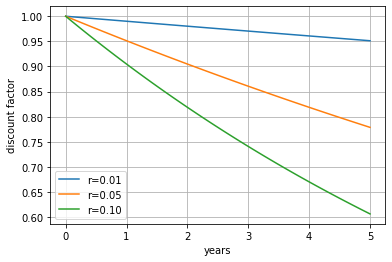

In [56]:
t = np.linspace(0,5)

for r in [0.01,0.05,0.1]:
    plt.plot(t,discount_factor(r,t), label = 'r=%4.2f'%r,lw = 1.5)

plt.xlabel('years')
plt.ylabel('discount factor')
plt.grid(True)
plt.legend(loc = 0)

In [58]:
#class기반 구현
class short_rate(object):
    '''
    고정 단기 이자율 객체모형
    
    properties
    ====
    name : string
        객체 이름
    rate : float 
        고정 단기 이자율
        
    method
    ====
    get_discount_factors:
        주어진 시간 리스트/배열 입력에 대한 할인율 반환
    '''
    def __init__(self,name,rate):
        self.name = name
        self.rate = rate
    def get_discount_factors(self,time_list):
        ''' time_list : list/araay-like'''
        time_list = np.array(time_list)
        return np.exp(-self.rate*time_list)

In [59]:
sr = short_rate('r',0.05)
sr.name, sr.rate

('r', 0.05)

In [60]:
time_list = [0.0,0.5,1.0,1.25,1.75,2.0] #연단위
sr.get_discount_factors(time_list)

array([1.        , 0.97530991, 0.95122942, 0.93941306, 0.91621887,
       0.90483742])

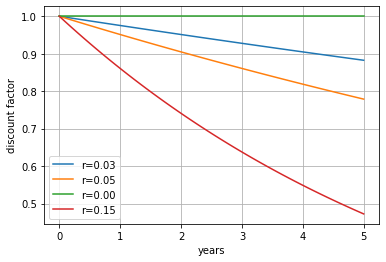

In [61]:
for r in [0.025,0.05,0.,0.15]:
    sr.rate = r
    plt.plot(t,sr.get_discount_factors(t),label = 'r=%4.2f'%sr.rate,lw =1.5)
    plt.xlabel('years')
    plt.ylabel('discount factor')
    plt.grid(True)
    plt.legend(loc = 0)

In [62]:
sr.rate =0.05
cash_flows = np.array([-100,50,75])
time_list = [0.0,1.0,2.0]

In [63]:
disc_facts = sr.get_discount_factors(time_list)
disc_facts

array([1.        , 0.95122942, 0.90483742])

In [64]:
#현가
disc_facts*cash_flows

array([-100.        ,   47.56147123,   67.86280635])

>NPV(순 현재가치)>0이면 투자, NPV = 각각의 현금흐름의 현재가치 합한 값

In [65]:
#NPV
np.sum(disc_facts*cash_flows)  #r = 0.5라면 투자 해야함

15.424277577732667

In [67]:
sr.rate = 0.15
np.sum(sr.get_discount_factors(time_list)*cash_flows) # r=0.15일경우 투자 X

-1.403234627618268

**13-1-3 현금 흐름 클래스**

In [72]:
class cash_flow_series(object):
    '''
    일련의 현금 흐름 모형을 위한 클래스
    
    properties
    ====
    name : string
        객체 이름
    time_list : list/array-like
        시간 list(연단위)
    cash_flows :list/array-like
        현금 흐름 값 list
    short_rate : instance of short_rate class
        할인에 사용되는 단기 이자율
    
    method
    ====
    prevent_value_list : 
        현재가치 배열 반환
    net_present_value:
        NPV반환
    '''
    def __init__(self,name,time_list,cash_flows,short_rate):
        self.name = name
        self.time_list = time_list
        self.cash_flows = cash_flows
        self.short_rate = short_rate
    def prevent_value_list(self):
        df = self.short_rate.get_discount_factors(self.time_list)
        return np.array(self.cash_flows)*df
    def net_prevent_value(self):
        return np.sum(self.prevent_value_list())

In [73]:
sr.rate = 0.05
cfs = cash_flow_series('cfs',time_list,cash_flows,sr)

In [74]:
cfs.cash_flows, cfs.time_list

(array([-100,   50,   75]), [0.0, 1.0, 2.0])

In [75]:
#이전 결과와 class사용 결과 비교
cfs.prevent_value_list(), cfs.net_prevent_value()

(array([-100.        ,   47.56147123,   67.86280635]), 15.424277577732667)

In [76]:
#계산단계 일반화
#민감도 분석(sensitivity analysis)위한 method제공하는 클래스 정의.
#(여러가지 다른 이자율 값에 대해 NPV계산하는)

In [77]:
class cfs_sensitivity(cash_flow_series):
    def npv_sensitivity(self,short_rates):
        npvs = []
        for rate in short_rates:
            sr.rate = rate
            npvs.append(self.net_prevent_value())
        return np.array(npvs)

In [78]:
cfs_sens = cfs_sensitivity('cfs',time_list,cash_flows,sr)

In [79]:
short_rates = [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.2]
npvs = cfs_sens.npv_sensitivity(short_rates)
npvs

array([23.01739219, 20.10770244, 15.42427758, 10.94027255,  6.64667738,
        2.53490386, -1.40323463, -8.78945889])

Text(0, 0.5, 'NPV')

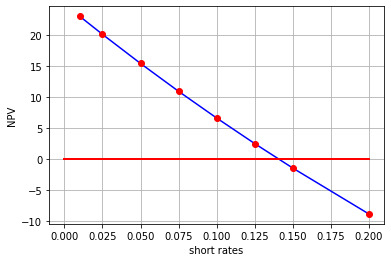

In [81]:
#굵은 수평선 > 수익률에 대해 수익성 있는 투자와 그렇지 않은 투자 구분하는 점
plt.plot(short_rates,npvs,'b')
plt.plot(short_rates,npvs,'ro')
plt.plot((0,max(short_rates)),(0,0),'r',lw = 2)
plt.grid(True)
plt.xlabel('short rates')
plt.ylabel('NPV')